# Άσκηση 10 - λύσεις

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df_money = pd.read_csv('data_banknote_authentication.csv', header = None )

df_money.columns = ['Variance_wavelet','Skewness_wavelet','Kurtosis_wavelet',
                     'Entropy_img','Class']

df_money.head()

,Variance_wavelet,Skewness_wavelet,Kurtosis_wavelet,Entropy_img,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Καθάρισμα

In [4]:
print(df_money.isnull().sum())

Variance_wavelet    0
Skewness_wavelet    0
Kurtosis_wavelet    0
Entropy_img         0
Class               0
dtype: int64


# Data Balancing

In [5]:
# Που έχουμε παραπάνω τιμές?
# Πόσα ψεύτικα? 
num_fakes = np.sum(df_money.Class)
print(num_fakes)
# Σύνολο
total_exmp = df_money.shape[0] 
print(total_exmp)
# Αληθινά
num_real = total_exmp - num_fakes
print(num_real)

610
1372
762


In [6]:
# Χωρίζουμε τα δεδομένα
# ψεύτικα
df_fake = df_money[df_money['Class'] == 1]
# Αληθινά
df_real = df_money[df_money['Class'] == 0]

In [7]:
# resampling 
df_real_downsampled = resample(df_real, 
                               replace=False,    
                               n_samples=610,    
                               random_state=123) 

print(df_real_downsampled.shape)

money_df_balanced = pd.concat([df_real_downsampled, df_fake])

(610, 5)


# Logistic Regression 

In [8]:

X = money_df_balanced.drop(columns = 'Class')
y = money_df_balanced['Class']

model_score_log_reg = []

true_labels_log_reg = []

predicted_labels_log_reg = []

our_cv = RepeatedKFold(n_splits=10, n_repeats=10)

log_reg = LogisticRegression(penalty='none', random_state=123, solver='saga', max_iter = 10000, warm_start=True)

for i_train, i_test in our_cv.split(X):

    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]

    log_reg.fit(X_train, y_train.astype('int'))

    y_pred_test = log_reg.predict(X_test)

    model_score_log_reg.append(accuracy_score(y_test.astype('int'), y_pred_test.astype('int')))
  
    true_labels_log_reg.extend(y_test.astype('int'))
    
    predicted_labels_log_reg.extend(y_pred_test.astype('int'))

In [9]:
print('Accuracy: '+str(np.mean(model_score_log_reg))+" %")

Accuracy: 0.9885245901639342 %


<ipython-input-10-3b4e1e095fff>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-10-3b4e1e095fff>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


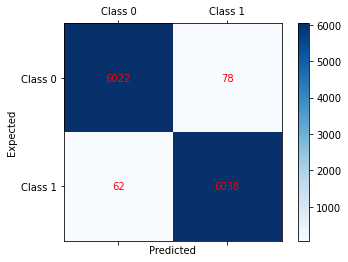

In [10]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=true_labels_log_reg, y_pred=predicted_labels_log_reg)

labels = ['Class 0', 'Class 1']

fig = plt.figure()

ax = fig.add_subplot(111)

cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)

fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('Expected')

for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='r')

plt.show()

# Decision trees



In [11]:
from sklearn import tree

model_score_dt = []

true_labels_dt = []

predicted_labels_dt = []

our_cv = RepeatedKFold(n_splits=10, n_repeats=10)

dec_tree = tree.DecisionTreeClassifier()

for i_train, i_test in our_cv.split(X):

    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]

    dec_tree.fit(X_train, y_train.astype('int'))

    y_pred_test = dec_tree.predict(X_test)

    model_score_dt.append(accuracy_score(y_test.astype('int'), y_pred_test.astype('int')))

    true_labels_dt.extend(y_test.astype('int'))

    predicted_labels_dt.extend(y_pred_test.astype('int'))

In [12]:
print('Accuracy: '+str(np.mean(model_score_dt))+" %")

Accuracy: 0.9838524590163934 %


<ipython-input-13-830609e915ba>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-13-830609e915ba>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


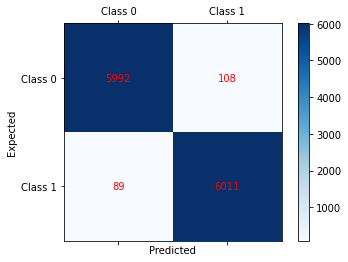

In [13]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=true_labels_dt, y_pred=predicted_labels_dt)

labels = ['Class 0', 'Class 1']

fig = plt.figure()

ax = fig.add_subplot(111)

cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)

fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('Expected')

for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='r')

plt.show()

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

model_score_rf = []

true_labels_rf = []

predicted_labels_rf = []

our_cv = RepeatedKFold(n_splits=10, n_repeats=10)

dec_tree =RandomForestClassifier(n_estimators=100)

for i_train, i_test in our_cv.split(X):

    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]

    dec_tree.fit(X_train, y_train.astype('int'))

    y_pred_test = dec_tree.predict(X_test)

    model_score_rf.append(accuracy_score(y_test.astype('int'), y_pred_test.astype('int')))

    true_labels_rf.extend(y_test.astype('int'))
   
    predicted_labels_rf.extend(y_pred_test.astype('int'))

In [15]:
print('Accuracy: '+str(np.mean(model_score_rf))+" %")

Accuracy: 0.9934426229508194 %


<ipython-input-16-0df68f541e98>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-0df68f541e98>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


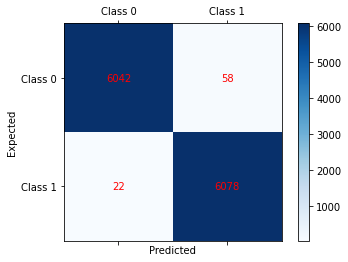

In [16]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=true_labels_rf, y_pred=predicted_labels_rf)

labels = ['Class 0', 'Class 1']

fig = plt.figure()

ax = fig.add_subplot(111)

cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)

fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('Expected')

for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='r')

plt.show()